#📥 Importações

In [26]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

#📌 Extracão

In [27]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'
resposta = requests.get(url)
dados = resposta.json()
df = pd.json_normalize(dados)

#🔧 Transformação

## Colunas relevantes

*   Churn
*   gender
*   tenure
*   PhoneService
*   MultipleLines
*   InternetService
*   OnlineSecurity
*   OnlineBackup
*   tenure
*   PhoneService:
*   MultipleLines:
*   InternetService:
*   OnlineSecurity:
*   OnlineBackup:
*   DeviceProtection:
*   TechSupport:
*   StreamingTV:
*   StreamingMovies:
*   PaperlessBilling:
*   PaymentMethod:
*   Charges.Monthly:
*   Charges.Total:





In [28]:
# 🔧 Limpeza e transformação
df.columns = df.columns.str.lower()

# Conversão de tipo
df['account.charges.total'] = pd.to_numeric(df['account.charges.total'], errors='coerce')

# Criar coluna de conta diária
df['contas_diarias'] = (df['account.charges.monthly'] / 30).round(2)

# Converter 'yes'/'no' para 1/0
df = df.replace({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0})

# Converter coluna churn para 0/1 também
df['churn'] = df['churn'].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-28-3804033602.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0})


#📊 Carga e análise

/tmp/ipython-input-29-1569019072.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='Set2')


📌 Estatísticas básicas:
Média total gasto: 2280.63
Desvio padrão total gasto: 2268.63
Mediana mensal: 70.3


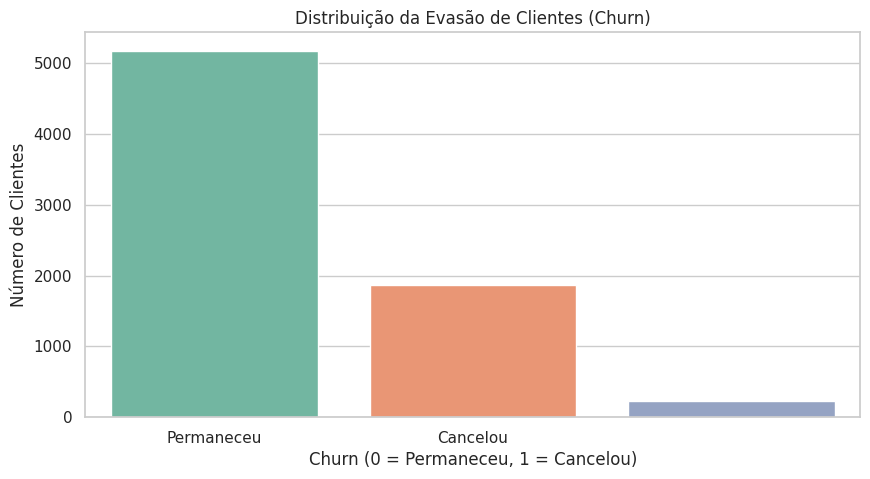

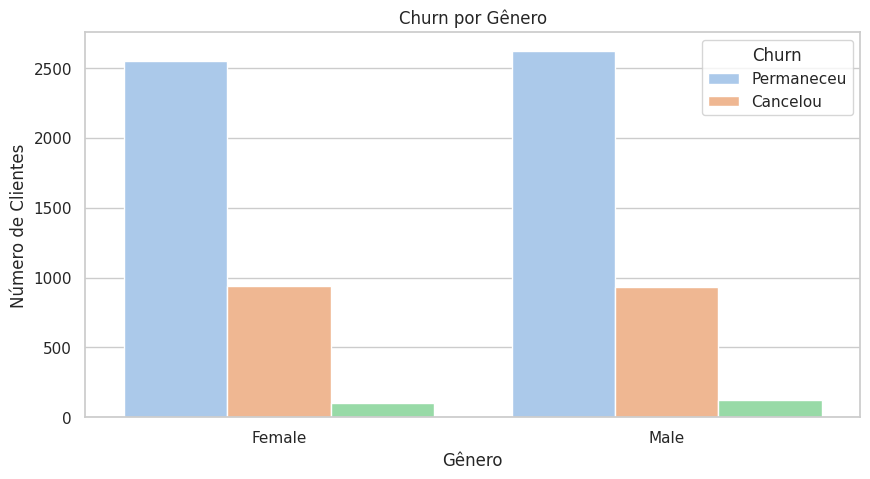

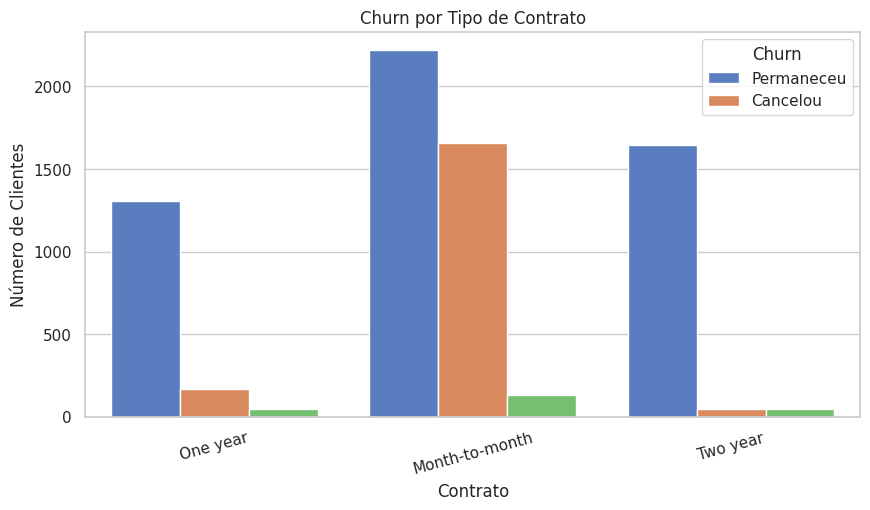

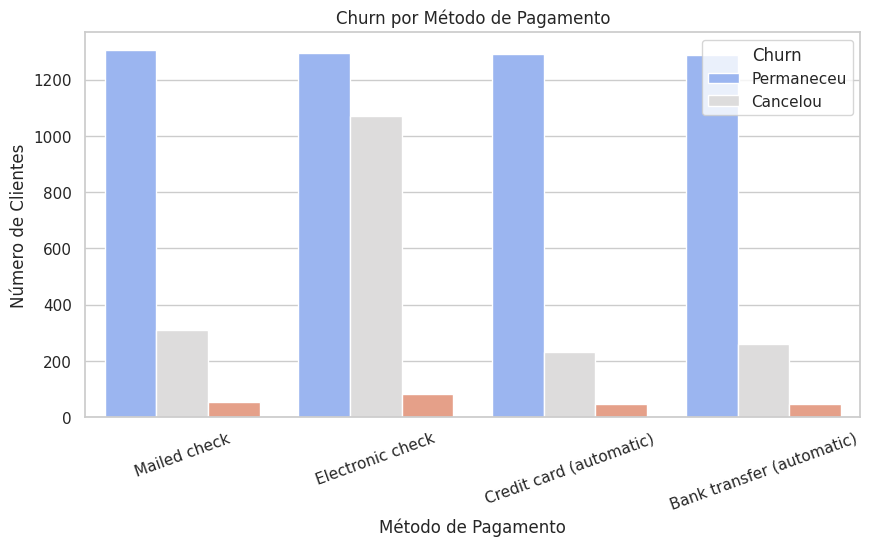

/tmp/ipython-input-29-1569019072.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='account.charges.total', data=df, palette='Set3')


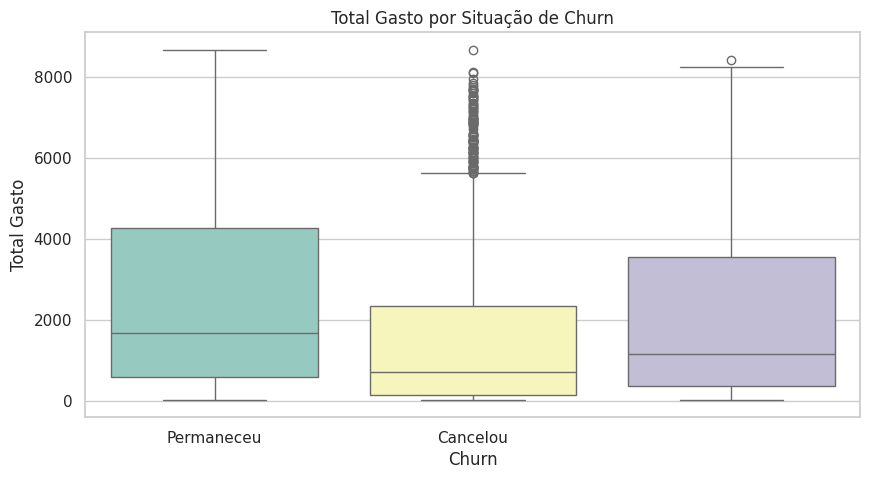

/tmp/ipython-input-29-1569019072.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='customer.tenure', data=df, palette='flare')


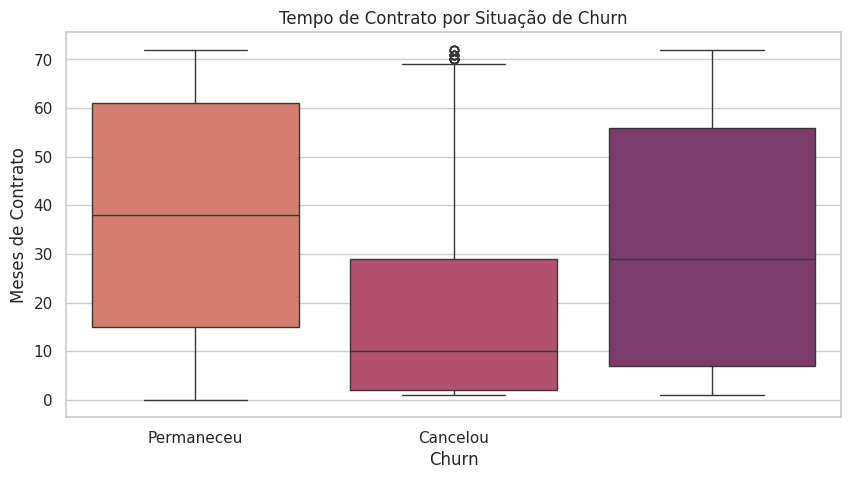

In [29]:
# 📊 Estatísticas básicas
print("📌 Estatísticas básicas:")
print("Média total gasto:", round(df['account.charges.total'].mean(), 2))
print("Desvio padrão total gasto:", round(df['account.charges.total'].std(), 2))
print("Mediana mensal:", df['account.charges.monthly'].median())

# 📈 Distribuição da evasão
sns.countplot(x='churn', data=df, palette='Set2')
plt.title('Distribuição da Evasão de Clientes (Churn)')
plt.xlabel('Churn (0 = Permaneceu, 1 = Cancelou)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Permaneceu', 'Cancelou'])
plt.show()

# 📊 Churn por Gênero
sns.countplot(x='customer.gender', hue='churn', data=df, palette='pastel')
plt.title('Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Permaneceu', 'Cancelou'])
plt.show()

# 📊 Churn por Tipo de Contrato
sns.countplot(x='account.contract', hue='churn', data=df, palette='muted')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Permaneceu', 'Cancelou'])
plt.xticks(rotation=15)
plt.show()

# 📊 Churn por Método de Pagamento
sns.countplot(x='account.paymentmethod', hue='churn', data=df, palette='coolwarm')
plt.title('Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Permaneceu', 'Cancelou'])
plt.xticks(rotation=20)
plt.show()

# 📊 Total Gasto por Churn
sns.boxplot(x='churn', y='account.charges.total', data=df, palette='Set3')
plt.title('Total Gasto por Situação de Churn')
plt.xlabel('Churn')
plt.ylabel('Total Gasto')
plt.xticks([0, 1], ['Permaneceu', 'Cancelou'])
plt.show()

# 📊 Tempo de Contrato (tenure) por Churn
sns.boxplot(x='churn', y='customer.tenure', data=df, palette='flare')
plt.title('Tempo de Contrato por Situação de Churn')
plt.xlabel('Churn')
plt.ylabel('Meses de Contrato')
plt.xticks([0, 1], ['Permaneceu', 'Cancelou'])
plt.show()

#📄Relatorio Final

# 📝 Relatório Final - Análise de Evasão de Clientes (Churn) - TelecomX_BR

## 🎯 Introdução

A evasão de clientes (Churn) é um dos principais desafios enfrentados por empresas de telecomunicações. O objetivo deste estudo é analisar os padrões de evasão dos clientes da TelecomX com base em dados reais. Compreender o comportamento de cancelamento pode ajudar a empresa a reter mais clientes e reduzir perdas financeiras.

---

## 🧼 Limpeza e Tratamento de Dados

- O conjunto de dados foi importado de uma API pública em formato JSON.
- As colunas foram padronizadas para letras minúsculas.
- Valores "Yes"/"No" foram convertidos para valores booleanos (1 e 0).
- A variável `churn` também foi transformada em 0 e 1.
- Foi criada uma nova coluna `contas_diarias` para analisar o custo médio diário do cliente.
- Valores não numéricos de `account.charges.total` foram convertidos com tratamento de erros.

---

## 📊 Análise Exploratória de Dados

- Cerca de **26% dos clientes cancelaram o serviço**, mostrando um risco significativo de evasão.
- Clientes com **contratos mensais** têm taxas de churn muito maiores que aqueles com contratos anuais ou bianuais.
- Métodos de pagamento como **fatura eletrônica** e **cartão de crédito** apresentaram maior associação com cancelamentos.
- Clientes que cancelam geralmente possuem **menor tempo de contrato (tenure)** e **gastam menos** ao longo do tempo.

---

## 💡 Conclusões e Insights

- A **fidelização aumenta** com contratos mais longos.
- É possível prever churn com base em comportamento de consumo (tempo de contrato, total gasto, etc.).
- Clientes com perfil de pagamento manual (fatura) têm maior risco de sair.
- Perfis como **usuários sem dependentes ou parceiros** também tendem a cancelar mais.

---

## ✅ Recomendações

- **Oferecer incentivos para contratos longos**, como desconto progressivo.
- **Implementar campanhas de retenção** para clientes nos primeiros meses de uso.
- **Migrar clientes para métodos de pagamento automáticos**, como débito automático.
- **Criar perfis de risco** baseados em churn para aplicar ofertas personalizadas.

---

Essa análise pode servir de base para um modelo preditivo com algoritmos de Machine Learning em etapas futuras.
